In [40]:
source("lda.R")

In [41]:
dfs <- read_wlws(800, "segment", 1)

[1] "unzips/n800/segment.scale-1"


In [42]:
library(MASS)

pca <- prcomp( ~. -class_id, data = dfs$train, rank. = 2)

In [43]:
proj <- predict(pca, dfs$train)

In [44]:
dim(proj)
colnames(proj)
class(proj)

[1] 800   2

[1] "PC1" "PC2"

[1] "matrix" "array"

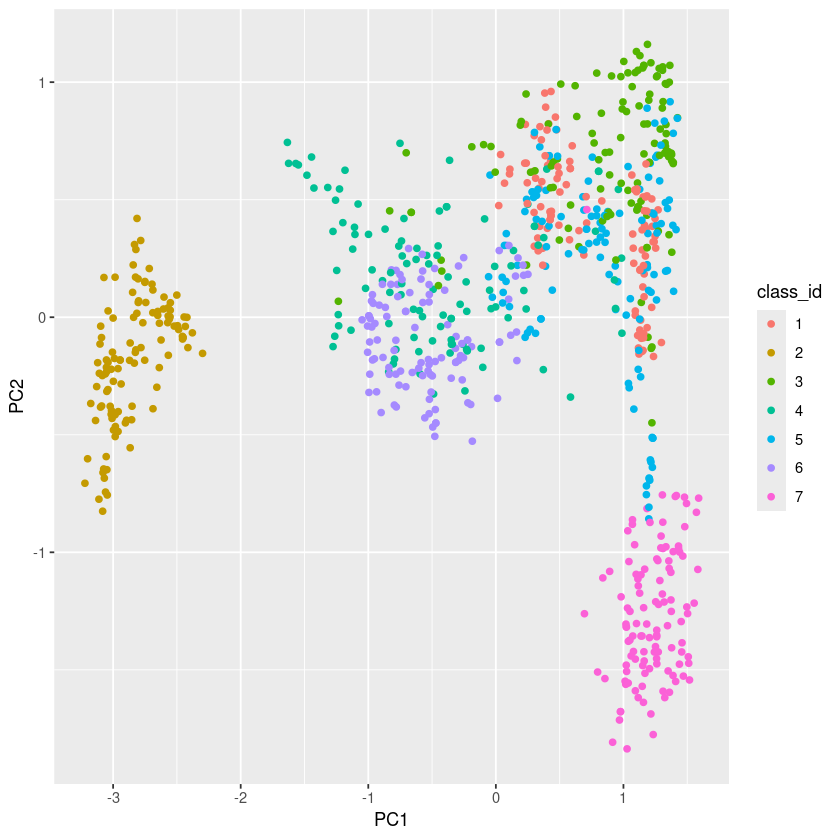

In [45]:
library(ggplot2)

dfg <- cbind(dfs$train, proj)
dfg$class_id = as.factor(dfg$class_id)
ggplot(dfg, aes(x = PC1, y = PC2, group = class_id, color = class_id)) + geom_point()

In [46]:
colnames(dfg)


[1] "class_id" "f1"       "f2"       "f3"       "f4"       "f5"      
 [7] "f6"       "f7"       "f8"       "f9"       "f10"      "f11"     
[13] "f12"      "f13"      "f14"      "f15"      "f16"      "f17"     
[19] "f18"      "f19"      "f20"      "f21"      "f22"      "f23"     
[25] "f24"      "f25"      "PC1"      "PC2"

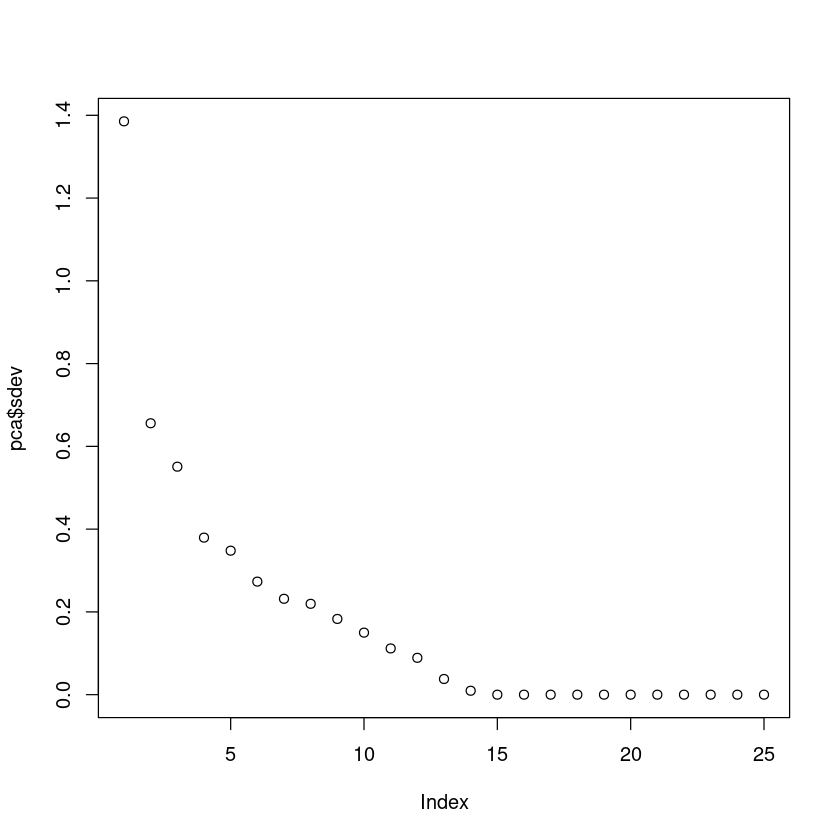

In [47]:
plot(pca$sdev)

In [49]:
m <- lda(class_id ~ . -f1 - f2 - f5-f22 - f23 - f24 - f25, data = dfs$train)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


In [ ]:
names(m)

In [53]:
ldm <- as.matrix(dplyr::select(dfs$train, -class_id,-f1, - f2, - f5,-f22, - f23, - f24, - f25)) %*% m$scaling[,1:2] 

In [ ]:
dim(m$scaling)

In [54]:
dfg1 <- cbind(dfs$train, ldm)
dfg1$class_id = as.factor(dfg1$class_id)

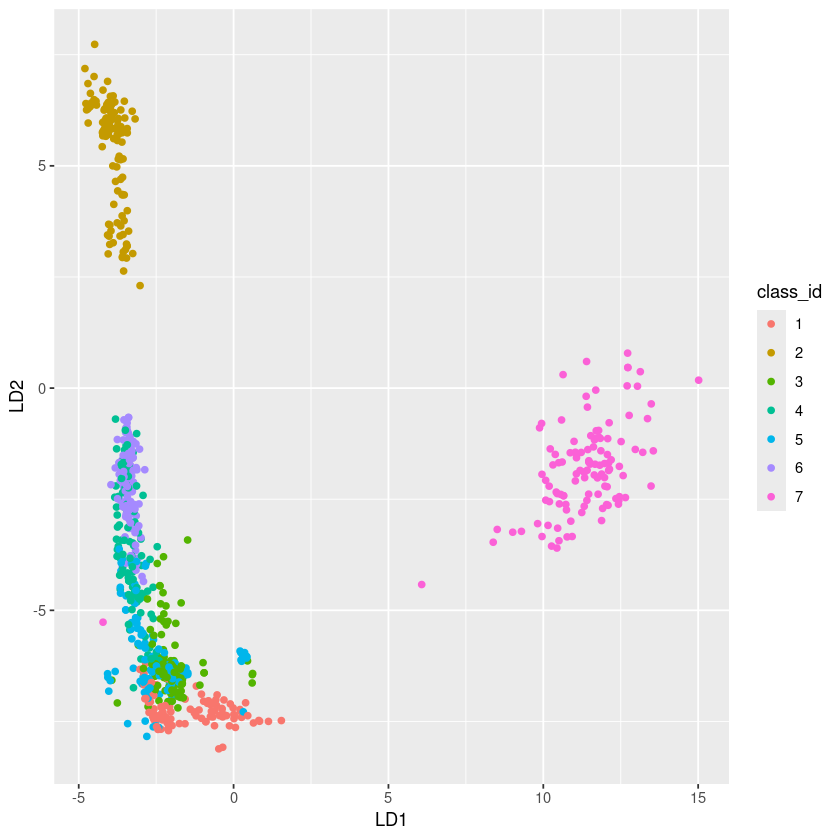

In [55]:
ggplot(dfg1, aes(x  = LD1, y = LD2, color = class_id)) + geom_point()